# Pasos para aplicar un modelo SARIMA

- Análisis exploratorio inicial: Observa la serie temporal para identificar posibles tendencias y estacionalidad. 

In [31]:
from api_somo import fetch_and_process_data
import numpy as np
import pandas as pd

api_filtrate_seire = "http://127.0.0.1:8000/database/filter-serie-qf/"
CCCP_fetch = {"station_name": "tumaco","variable_name": "Precipitación acumulada","processing_level_name": "Control de calidad"}
serie_cccp = fetch_and_process_data(api_filtrate_seire, CCCP_fetch)
serie_cccp.head()


,value,qf,month
timestamp,,,
2009-02-01 05:10:00+00:00,0.0,1,2
2009-02-01 05:20:00+00:00,0.0,1,2
2009-02-01 05:30:00+00:00,0.0,1,2
2009-02-01 05:40:00+00:00,0.0,1,2
2009-02-01 05:50:00+00:00,0.0,1,2


In [32]:
serie_cccp.loc[~serie_cccp['qf'].isin([1, 3]), 'value'] = np.nan
#serie_cccp.loc[serie_cccp['qf'] == 9, 'value'] = np.nan


In [33]:
#Muestra cuantas celdas con datos nulos o faltantes tiene cada columna de la base de datos
serie_cccp.isnull().sum()

value    29717
qf           0
month        0
dtype: int64

In [1]:
from statsmodels.tsa.stattools import adfuller

# Prueba ADF para verificar la estacionariedad
result = adfuller(serie_cccp)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


NameError: name 'serie_cccp' is not defined

## 1. Gráficos Exploratorios 

### Analisis visual
- Full resolucion
- Acumulado diario
- Acumulado semanal
- Acumulado mensual

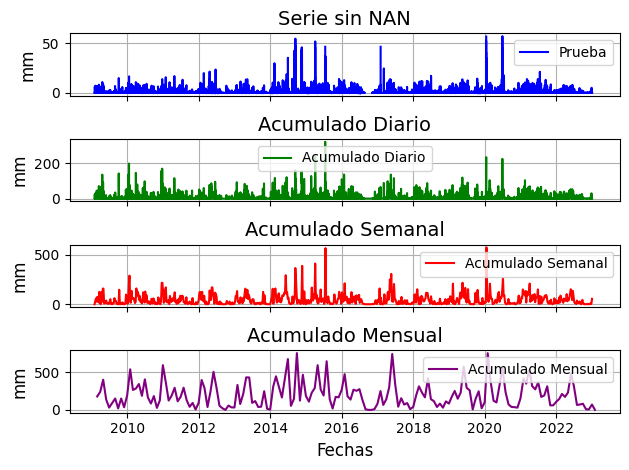

In [34]:
# Gráficar
import matplotlib.pyplot as plt

# Filtrar los datos del año 2009
#serie_cccp = serie_cccp.loc['2009']

# Crear la figura y los subplots
fig, axs = plt.subplots(4, 1, sharex=True)

# Serie original sin NaN
axs[0].plot(serie_cccp.index, serie_cccp['value'], label='Prueba', color='blue')
axs[0].set_title("Serie sin NAN", fontsize=14)
axs[0].set_ylabel("mm", fontsize=12)
axs[0].legend()
axs[0].grid(True)

# Acumulado diario
acumulado_diario = serie_cccp['value'].resample('D').sum()
axs[1].plot(acumulado_diario.index, acumulado_diario, label='Acumulado Diario', color='green')
axs[1].set_title("Acumulado Diario", fontsize=14)
axs[1].set_ylabel("mm", fontsize=12)
axs[1].legend()
axs[1].grid(True)

# Acumulado semanal
acumulado_semanal = serie_cccp['value'].resample('W').sum()
axs[2].plot(acumulado_semanal.index, acumulado_semanal, label='Acumulado Semanal', color='red')
axs[2].set_title("Acumulado Semanal", fontsize=14)
axs[2].set_ylabel("mm", fontsize=12)
axs[2].legend()
axs[2].grid(True)

# Acumulado mensual
acumulado_mensual = serie_cccp['value'].resample('ME').sum()
axs[3].plot(acumulado_mensual.index, acumulado_mensual, label='Acumulado Mensual', color='purple')
axs[3].set_title("Acumulado Mensual", fontsize=14)
axs[3].set_xlabel("Fechas", fontsize=12)
axs[3].set_ylabel("mm", fontsize=12)
axs[3].legend()
axs[3].grid(True)

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()



C:\Users\dreng\AppData\Local\Temp\ipykernel_53228\1113131261.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  acumulado_mensual = serie_cccp['value'].resample('M').sum()


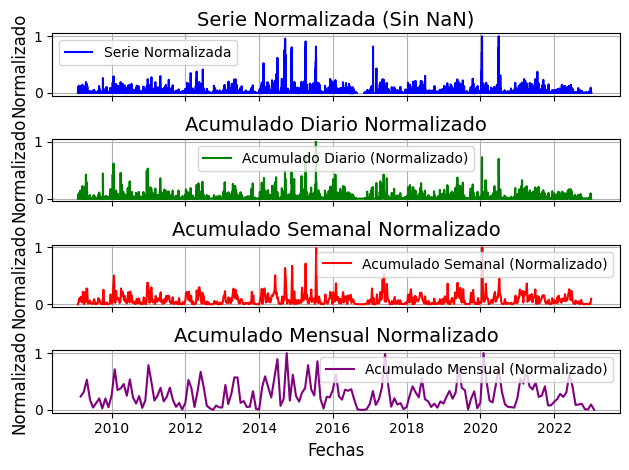

In [35]:
fig, axs = plt.subplots(4, 1, sharex=True)

# Serie original normalizada
serie_normalizada = (serie_cccp['value'] - serie_cccp['value'].min()) / (serie_cccp['value'].max() - serie_cccp['value'].min())
axs[0].plot(serie_cccp.index, serie_normalizada, label='Serie Normalizada', color='blue')
axs[0].set_title("Serie Normalizada (Sin NaN)", fontsize=14)
axs[0].set_ylabel("Normalizado", fontsize=12)
axs[0].legend()
axs[0].grid(True)

# Acumulado diario normalizado
acumulado_diario = serie_cccp['value'].resample('D').sum()
acumulado_diario_normalizado = (acumulado_diario - acumulado_diario.min()) / (acumulado_diario.max() - acumulado_diario.min())
axs[1].plot(acumulado_diario.index, acumulado_diario_normalizado, label='Acumulado Diario (Normalizado)', color='green')
axs[1].set_title("Acumulado Diario Normalizado", fontsize=14)
axs[1].set_ylabel("Normalizado", fontsize=12)
axs[1].legend()
axs[1].grid(True)

# Acumulado semanal normalizado
acumulado_semanal = serie_cccp['value'].resample('W').sum()
acumulado_semanal_normalizado = (acumulado_semanal - acumulado_semanal.min()) / (acumulado_semanal.max() - acumulado_semanal.min())
axs[2].plot(acumulado_semanal.index, acumulado_semanal_normalizado, label='Acumulado Semanal (Normalizado)', color='red')
axs[2].set_title("Acumulado Semanal Normalizado", fontsize=14)
axs[2].set_ylabel("Normalizado", fontsize=12)
axs[2].legend()
axs[2].grid(True)

# Acumulado mensual normalizado
acumulado_mensual = serie_cccp['value'].resample('M').sum()
acumulado_mensual_normalizado = (acumulado_mensual - acumulado_mensual.min()) / (acumulado_mensual.max() - acumulado_mensual.min())
axs[3].plot(acumulado_mensual.index, acumulado_mensual_normalizado, label='Acumulado Mensual (Normalizado)', color='purple')
axs[3].set_title("Acumulado Mensual Normalizado", fontsize=14)
axs[3].set_xlabel("Fechas", fontsize=12)
axs[3].set_ylabel("Normalizado", fontsize=12)
axs[3].legend()
axs[3].grid(True)

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()


## Descomposiciones de series temporales. 

Determina si hay patrones estacionales regulares y si la serie necesita diferenciación para volverse estacionaria.

Esto se puede hacer mediante gráficos y descomposiciones de series temporales. Determina si hay patrones estacionales regulares y si la serie necesita diferenciación para volverse estacionaria.

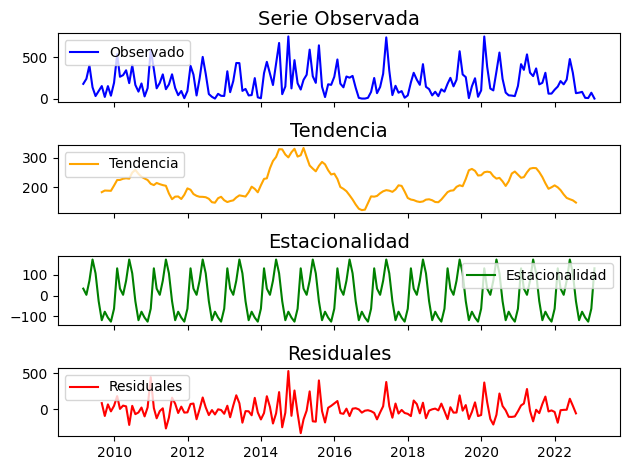

In [37]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Asegurarnos de que el índice sea de tipo datetime y la serie esté completa
acumulado_mensual = acumulado_mensual.dropna()  # Eliminar valores NaN

# Realizar la descomposición estacional
result = seasonal_decompose(acumulado_mensual, model='additive', period=12)

# Graficar los resultados
fig, axs = plt.subplots(4, 1, sharex=True)

axs[0].plot(result.observed, label='Observado', color='blue')
axs[0].set_title("Serie Observada", fontsize=14)
axs[0].legend()

axs[1].plot(result.trend, label='Tendencia', color='orange')
axs[1].set_title("Tendencia", fontsize=14)
axs[1].legend()

axs[2].plot(result.seasonal, label='Estacionalidad', color='green')
axs[2].set_title("Estacionalidad", fontsize=14)
axs[2].legend()

axs[3].plot(result.resid, label='Residuales', color='red')
axs[3].set_title("Residuales", fontsize=14)
axs[3].legend()

plt.tight_layout()
plt.show()


<Figure size 800x400 with 0 Axes>

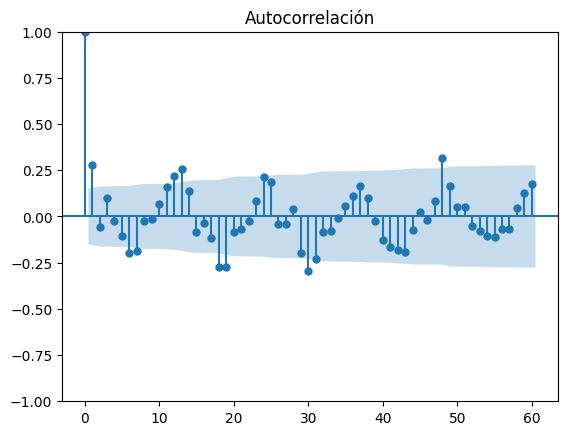

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

# Graficar la autocorrelación para identificar el período dominante
plt.figure(figsize=(8, 4))
plot_acf(acumulado_mensual, lags=60)  # Cambia lags según tus datos
plt.title("Autocorrelación")
plt.show()
